# DataSet

In [39]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

data_13 = pd.read_csv('/Users/baby_cow/Desktop/AI/ML_competition/data/geocoded_addresses_13.csv')

In [40]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

data = pd.read_csv('/Users/baby_cow/Desktop/AI/ML_competition/data/geocoded_addresses_12.csv')
len(data.query("is_test == 1"))

9272

In [41]:
import pandas as pd

outlier_data = data_13[['is_outlier', 'percentage_difference']]

test_cnt = len(data.query("is_test == 1"))
test_outlier_data =pd.DataFrame({"is_outlier" : [False] * test_cnt, "percentage_difference" : [0] * test_cnt})

outlier_data = pd.concat([outlier_data, test_outlier_data])
outlier_data

,is_outlier,percentage_difference
0,True,-15.906998
1,False,2.392918
2,False,-1.123046
3,False,-5.709482
4,False,14.318237
...,...,...
9267,False,0.000000
9268,False,0.000000
9269,False,0.000000
9270,False,0.000000


In [42]:
temp_index = list(range(len(data)))
data['id'] = temp_index
selected_columns = ['id', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '구', '동', '건축년도', '주차대수', '강남여부',
                    'closest_bus_stop_distance','closest_subway_station_distance', 'bus_stop_count_500m',
                    'subway_station_count_500m', 'bus_stop_count_750m',
                    'subway_station_count_750m', 'bus_stop_count_1000m',
                    'subway_station_count_1000m', 'distance_to_lead_house', 'is_test', 'target', 'apt_mean_target', 'mean_target']

df = data[selected_columns]

df['전용면적'] = df['전용면적(㎡)']
df.drop(columns=['전용면적(㎡)'], axis=1, inplace=True)

df['계약년'] = df['계약년월'].map(lambda x : int(str(x)[:4]))

outlier_data = outlier_data.reset_index(drop=True)
df['is_outlier'] = outlier_data['is_outlier']
df['percentage_difference'] = outlier_data['percentage_difference']


# Outlier 제거

In [43]:
df = df.loc[(df['is_outlier'] == False) & 
(df['percentage_difference'] > -20) & 
(df['percentage_difference'] < 40), :]

df

,id,아파트명,계약년월,계약일,층,구,동,건축년도,주차대수,강남여부,...,subway_station_count_1000m,distance_to_lead_house,is_test,target,apt_mean_target,mean_target,전용면적,계약년,is_outlier,percentage_difference
1,1,개포6차우성,2017-12-01,22,4,강남구,개포동,1987,262.0,1,...,0,6.609733,0,123500.0,104403.465347,119240.517241,79.97,2017,False,2.392918
2,2,개포6차우성,2017-12-01,28,5,강남구,개포동,1987,262.0,1,...,0,6.609733,0,91500.0,104403.465347,86362.500000,54.98,2017,False,-1.123046
3,3,개포6차우성,2018-01-01,3,4,강남구,개포동,1987,262.0,1,...,0,6.609733,0,130000.0,104403.465347,119240.517241,79.97,2018,False,-5.709482
4,4,개포6차우성,2018-01-01,8,2,강남구,개포동,1987,262.0,1,...,0,6.609733,0,117000.0,104403.465347,119240.517241,79.97,2018,False,14.318237
5,5,개포6차우성,2018-01-01,11,1,강남구,개포동,1987,262.0,1,...,0,6.609733,0,130000.0,104403.465347,119240.517241,79.97,2018,False,-3.664040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,1128089,신내우디안1단지,2023-07-01,19,13,중랑구,신내동,2014,1568.0,0,...,2,4.498422,1,NaN,40355.229672,41145.553097,84.65,2023,False,0.000000
1128090,1128090,신내우디안1단지,2023-07-01,25,12,중랑구,신내동,2014,1568.0,0,...,2,4.498422,1,NaN,40355.229672,38443.000000,84.62,2023,False,0.000000
1128091,1128091,신내우디안1단지,2023-08-01,27,12,중랑구,신내동,2014,1568.0,0,...,2,4.498422,1,NaN,40355.229672,46297.220000,101.65,2023,False,0.000000
1128092,1128092,신내우디안1단지,2023-09-01,2,18,중랑구,신내동,2014,1568.0,0,...,2,4.498422,1,NaN,40355.229672,39599.700000,84.94,2023,False,0.000000


# 지역별 chunk 나누기

In [44]:
chunks = {}

regions = df['구'].unique()

for region in regions:
    chunk = df[df['구'] == region]
    chunk.sort_values(by='계약년월')
    chunks[region] = chunk

# 올해 + 1년 전 우리 구 평균 부동산 가격 피쳐 만들기

In [47]:
from IPython.display import display

for region in regions:
    chunk = chunks[region]

    year_target_means = {}

    for year in range(2007, 2024):
        this_year_target_mean = chunk.loc[(chunk['계약년'] == year) & (chunk['is_test'] == 0) ,'target'].mean()
        chunk.loc[(chunk['계약년'] == year) , '올해 지역 평균'] =  this_year_target_mean
        year_target_means[year] = this_year_target_mean

        if year == 2007:
            chunk.loc[(chunk['계약년'] == year), '작년 지역 평균'] = this_year_target_mean
        else:
            chunk.loc[(chunk['계약년'] == year), '작년 지역 평균'] = year_target_means[year-1]
    
    chunks[region] = chunk

# 모델 학습

In [48]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

result_board = []
result = pd.DataFrame()

params = {
    'objective': 'regression', 
    'metric': 'rmse',           
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'lambda_l2' : 0.1,
    'drop_rate' : 0.2,
    'verbose' : -1
}

for region in tqdm(regions):
    chunk = chunks[region]

    select_cols = ['id','층', '건축년도', '주차대수', '강남여부',
        'closest_bus_stop_distance', 'closest_subway_station_distance',
        'bus_stop_count_500m', 'subway_station_count_500m',
        'bus_stop_count_750m', 'subway_station_count_750m',
        'bus_stop_count_1000m', 'subway_station_count_1000m',
        'distance_to_lead_house', 'is_test', 'target', 'apt_mean_target', 'mean_target', '전용면적', '계약년',
        '올해 지역 평균', '작년 지역 평균']
    
    chunk = chunk[select_cols]

    train_chunk = chunk.query('is_test == 0')
    test_chunk = chunk.query('is_test == 1')

    train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
    test_chunk.drop(columns = ['is_test'], axis = 1, inplace = True)

    X = train_chunk.drop(columns=['target'], axis=1)
    y = train_chunk['target']

    tscv = TimeSeriesSplit(n_splits = 17)
    
    min_rmse = int(1e9)

    model = None
    for fold, (train_index, val_index) in enumerate(tscv.split(X), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        train_data = lgb.Dataset(X_train, label = y_train)
        val_data = lgb.Dataset(X_val, label = y_val, reference = train_data)

        if model :
            model = lgb.train(
                params,
                train_data,
                num_boost_round=5000,
                init_model = model,
                valid_sets = [train_data, val_data],
                callbacks = [lgb.early_stopping(stopping_rounds=5), lgb.log_evaluation(period=-1)],
            )
        else:
            model = lgb.train(
                params,
                train_data,
                num_boost_round=5000,
                valid_sets = [train_data, val_data],
                callbacks = [lgb.early_stopping(stopping_rounds=5), lgb.log_evaluation(period=-1)],
            )
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        min_rmse = min(min_rmse, rmse)

    result_board.append({"지역" : region, "validation RMSE" : min_rmse})

    final_train_data = lgb.Dataset(X, label=y)
    final_model = lgb.train(params,
                            final_train_data,
                            init_model = model,
                            num_boost_round=model.best_iteration,
                            callbacks = [lgb.log_evaluation(period=-1)],
                            )

    test_X = test_chunk.drop(columns=['id', 'target'], axis=1)
    pred = final_model.predict(test_X)

    test_chunk['target'] = pred

    result = pd.concat([result, test_chunk[['id', 'target']]]) 


  0%|          | 0/25 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[383]	training's rmse: 12696.6	valid_1's rmse: 45326.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[613]	training's rmse: 12454.2	valid_1's rmse: 13933.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[767]	training's rmse: 11259.5	valid_1's rmse: 56184.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[891]	training's rmse: 15655.6	valid_1's rmse: 39484.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1074]	training's rmse: 16747.6	valid_1's rmse: 25101.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1082]	training's rmse: 18184.3	valid_1's rmse: 22813.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13

  4%|▍         | 1/25 [01:12<29:10, 72.94s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[170]	training's rmse: 6916.89	valid_1's rmse: 16053
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[741]	training's rmse: 3926.06	valid_1's rmse: 7635.91
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[804]	training's rmse: 4311.66	valid_1's rmse: 15741.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1156]	training's rmse: 4193.91	valid_1's rmse: 28853.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1257]	training's rmse: 7298.85	valid_1's rmse: 10950.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1324]	training's rmse: 6715.9	valid_1's rmse: 7705.32
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1325

  8%|▊         | 2/25 [02:32<29:31, 77.03s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[650]	training's rmse: 2499.27	valid_1's rmse: 6563.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[991]	training's rmse: 2491.42	valid_1's rmse: 3161.38
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[993]	training's rmse: 2719.64	valid_1's rmse: 24869
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1175]	training's rmse: 3743.92	valid_1's rmse: 8160.04
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1186]	training's rmse: 4720.38	valid_1's rmse: 9620.14
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1403]	training's rmse: 3748.99	valid_1's rmse: 6450.48
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1404

 12%|█▏        | 3/25 [03:10<21:40, 59.10s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[481]	training's rmse: 3810.46	valid_1's rmse: 11006.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[699]	training's rmse: 3751	valid_1's rmse: 5610.42
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[700]	training's rmse: 4440.91	valid_1's rmse: 27198.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[892]	training's rmse: 5218.71	valid_1's rmse: 8443.02
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[954]	training's rmse: 5438.22	valid_1's rmse: 7573.74
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[955]	training's rmse: 5836.22	valid_1's rmse: 6371.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[956]	tra

 16%|█▌        | 4/25 [04:22<22:24, 64.01s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[284]	training's rmse: 3524.17	valid_1's rmse: 8746.23
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[580]	training's rmse: 3047.11	valid_1's rmse: 3599.85
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[587]	training's rmse: 3207.78	valid_1's rmse: 30803.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[786]	training's rmse: 4589.36	valid_1's rmse: 9058.76
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[946]	training's rmse: 4315.75	valid_1's rmse: 8531.51
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[947]	training's rmse: 5243.06	valid_1's rmse: 5716.23
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1012

 20%|██        | 5/25 [05:12<19:40, 59.03s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[318]	training's rmse: 6109.29	valid_1's rmse: 17299.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[657]	training's rmse: 5276.23	valid_1's rmse: 7615.57
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[659]	training's rmse: 6124.21	valid_1's rmse: 36960.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1049]	training's rmse: 6716.84	valid_1's rmse: 16308.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1175]	training's rmse: 7609.32	valid_1's rmse: 13395.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1176]	training's rmse: 8817.34	valid_1's rmse: 11715.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1

 24%|██▍       | 6/25 [05:50<16:24, 51.80s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[449]	training's rmse: 2612.85	valid_1's rmse: 9577.01
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[637]	training's rmse: 3169.02	valid_1's rmse: 7716.29
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1308]	training's rmse: 2536.95	valid_1's rmse: 14827.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1474]	training's rmse: 3689.33	valid_1's rmse: 8367.68
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1591]	training's rmse: 4003.24	valid_1's rmse: 7443.18
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1637]	training's rmse: 4329.18	valid_1's rmse: 6270.88
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[

 28%|██▊       | 7/25 [07:00<17:24, 58.00s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[555]	training's rmse: 1899.06	valid_1's rmse: 6628.84
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[712]	training's rmse: 2036.2	valid_1's rmse: 9654.02
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1085]	training's rmse: 2200.7	valid_1's rmse: 17508.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1256]	training's rmse: 3501.33	valid_1's rmse: 7176.96
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1301]	training's rmse: 3925.41	valid_1's rmse: 6500.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1373]	training's rmse: 3804.63	valid_1's rmse: 3483.14
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137

 32%|███▏      | 8/25 [07:41<14:52, 52.52s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[415]	training's rmse: 2509.11	valid_1's rmse: 7382.99
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[589]	training's rmse: 2656.88	valid_1's rmse: 3953.11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1011]	training's rmse: 2371.86	valid_1's rmse: 16557.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1163]	training's rmse: 3889.44	valid_1's rmse: 8313.19
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1195]	training's rmse: 4574.54	valid_1's rmse: 7720.42
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1271]	training's rmse: 4380.5	valid_1's rmse: 3403.21
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1

 36%|███▌      | 9/25 [09:18<17:43, 66.45s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[232]	training's rmse: 2641.8	valid_1's rmse: 7307.98
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[474]	training's rmse: 2317.37	valid_1's rmse: 6192.38
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[917]	training's rmse: 2302.55	valid_1's rmse: 12857.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1025]	training's rmse: 3947.84	valid_1's rmse: 8463.24
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1066]	training's rmse: 4491.16	valid_1's rmse: 5816.83
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1111]	training's rmse: 4294.64	valid_1's rmse: 3671.83
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11

 40%|████      | 10/25 [10:14<15:46, 63.07s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[376]	training's rmse: 4029.93	valid_1's rmse: 7803.03
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[718]	training's rmse: 3386.76	valid_1's rmse: 9216.48
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1209]	training's rmse: 3154.34	valid_1's rmse: 21763.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1392]	training's rmse: 4606.55	valid_1's rmse: 9990.79
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1550]	training's rmse: 4802.91	valid_1's rmse: 9020
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1638]	training's rmse: 5018.43	valid_1's rmse: 6748.01
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[163

 44%|████▍     | 11/25 [27:37<1:24:43, 363.08s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[378]	training's rmse: 5225.57	valid_1's rmse: 13479.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[718]	training's rmse: 4747.21	valid_1's rmse: 9498.82
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1189]	training's rmse: 4551.48	valid_1's rmse: 24324.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1334]	training's rmse: 6847.96	valid_1's rmse: 11900.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1422]	training's rmse: 7113.81	valid_1's rmse: 10163.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1423]	training's rmse: 7690.65	valid_1's rmse: 7337.49
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[

 48%|████▊     | 12/25 [45:00<2:03:27, 569.82s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[407]	training's rmse: 6230.26	valid_1's rmse: 13846.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[717]	training's rmse: 5954.96	valid_1's rmse: 6165.47
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[718]	training's rmse: 6015.2	valid_1's rmse: 37883.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[961]	training's rmse: 7287.58	valid_1's rmse: 12995
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1861]	training's rmse: 6078.6	valid_1's rmse: 10947.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2011]	training's rmse: 6368.32	valid_1's rmse: 10218.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2129]	

 52%|█████▏    | 13/25 [1:01:12<2:18:20, 691.75s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[549]	training's rmse: 4836.85	valid_1's rmse: 8604.13
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[894]	training's rmse: 4112.63	valid_1's rmse: 8645.65
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1297]	training's rmse: 3829.77	valid_1's rmse: 24875.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1425]	training's rmse: 6288.25	valid_1's rmse: 10823.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1525]	training's rmse: 5936.66	valid_1's rmse: 8789.77
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1526]	training's rmse: 6487.66	valid_1's rmse: 6764.06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[

 56%|█████▌    | 14/25 [1:01:44<1:30:18, 492.57s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[317]	training's rmse: 12512.8	valid_1's rmse: 40431.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[882]	training's rmse: 9991.99	valid_1's rmse: 15518.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[883]	training's rmse: 12081.5	valid_1's rmse: 66293.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[980]	training's rmse: 18285	valid_1's rmse: 29827.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1122]	training's rmse: 16048.6	valid_1's rmse: 27609.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1205]	training's rmse: 16085.8	valid_1's rmse: 18368.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1230

 60%|██████    | 15/25 [1:18:36<1:48:09, 648.97s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[624]	training's rmse: 6975.85	valid_1's rmse: 15706.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1016]	training's rmse: 5709.75	valid_1's rmse: 5730.77
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1021]	training's rmse: 5680.17	valid_1's rmse: 58164.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1190]	training's rmse: 12275.1	valid_1's rmse: 18156.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1375]	training's rmse: 11046.7	valid_1's rmse: 14595.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1386]	training's rmse: 11519.3	valid_1's rmse: 10118.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:


 64%|██████▍   | 16/25 [1:36:48<1:57:22, 782.46s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[452]	training's rmse: 3709.33	valid_1's rmse: 7312.04
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[651]	training's rmse: 3445.93	valid_1's rmse: 4462.03
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[914]	training's rmse: 3233.86	valid_1's rmse: 29370.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1101]	training's rmse: 4697.82	valid_1's rmse: 9671.12
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1190]	training's rmse: 4826.17	valid_1's rmse: 10737.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1323]	training's rmse: 4826.18	valid_1's rmse: 7263.79
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1

 68%|██████▊   | 17/25 [1:53:59<1:54:16, 857.03s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[306]	training's rmse: 7431.17	valid_1's rmse: 26993.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[530]	training's rmse: 6924.6	valid_1's rmse: 8907.03
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1048]	training's rmse: 5765.59	valid_1's rmse: 23743.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1516]	training's rmse: 6360.46	valid_1's rmse: 34369.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1613]	training's rmse: 10070.4	valid_1's rmse: 10593.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1614]	training's rmse: 10137	valid_1's rmse: 13141.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[163

 72%|███████▏  | 18/25 [2:10:11<1:44:01, 891.69s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[225]	training's rmse: 6771.79	valid_1's rmse: 14756.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[532]	training's rmse: 4761.9	valid_1's rmse: 7525.81
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[666]	training's rmse: 4862.93	valid_1's rmse: 19695.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1113]	training's rmse: 4838.71	valid_1's rmse: 25679
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1228]	training's rmse: 6800.15	valid_1's rmse: 13162.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1285]	training's rmse: 7017.79	valid_1's rmse: 9298.45
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1286

 76%|███████▌  | 19/25 [2:26:51<1:32:24, 924.15s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[683]	training's rmse: 4173.57	valid_1's rmse: 15032.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1053]	training's rmse: 5047.07	valid_1's rmse: 5058.21
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1223]	training's rmse: 4417.59	valid_1's rmse: 38251.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1417]	training's rmse: 6776.41	valid_1's rmse: 12901.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2202]	training's rmse: 5605.98	valid_1's rmse: 10888.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2378]	training's rmse: 5686.19	valid_1's rmse: 11039.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:


 80%|████████  | 20/25 [2:43:58<1:19:35, 955.11s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[361]	training's rmse: 9164.47	valid_1's rmse: 75312.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[585]	training's rmse: 12163	valid_1's rmse: 12551.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[901]	training's rmse: 9019.76	valid_1's rmse: 82796.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[973]	training's rmse: 24674.6	valid_1's rmse: 34892.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1191]	training's rmse: 17030.3	valid_1's rmse: 23290.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1318]	training's rmse: 15224.2	valid_1's rmse: 15805.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1330

 84%|████████▍ | 21/25 [2:59:28<1:03:09, 947.48s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[345]	training's rmse: 3135.62	valid_1's rmse: 8727.51
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[612]	training's rmse: 3327.87	valid_1's rmse: 5831.35
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[799]	training's rmse: 3222.74	valid_1's rmse: 22069.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[985]	training's rmse: 4659.2	valid_1's rmse: 9173.25
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1258]	training's rmse: 4536.51	valid_1's rmse: 9385.49
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1365]	training's rmse: 4674	valid_1's rmse: 8500.97
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1366]	

 88%|████████▊ | 22/25 [3:00:05<33:42, 674.23s/it]  

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[405]	training's rmse: 4834.95	valid_1's rmse: 11675.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[810]	training's rmse: 5215.99	valid_1's rmse: 10968.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[969]	training's rmse: 5690.97	valid_1's rmse: 28534.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1186]	training's rmse: 7733.35	valid_1's rmse: 12784.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1562]	training's rmse: 6445.67	valid_1's rmse: 12441.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1606]	training's rmse: 7021.81	valid_1's rmse: 12437.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1

 92%|█████████▏| 23/25 [3:16:43<25:43, 771.56s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[325]	training's rmse: 4945.58	valid_1's rmse: 14607.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[633]	training's rmse: 5865.8	valid_1's rmse: 12104.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[634]	training's rmse: 8432.27	valid_1's rmse: 34897.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1205]	training's rmse: 8104.45	valid_1's rmse: 14042.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2351]	training's rmse: 6407	valid_1's rmse: 19253.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2848]	training's rmse: 6133.26	valid_1's rmse: 8699.46
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2853]

 96%|█████████▌| 24/25 [3:17:22<09:11, 551.52s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[593]	training's rmse: 2604.48	valid_1's rmse: 5213.67
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[782]	training's rmse: 2419.88	valid_1's rmse: 8005.69
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1435]	training's rmse: 2229.03	valid_1's rmse: 13973.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1568]	training's rmse: 3770.77	valid_1's rmse: 6582.76
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1594]	training's rmse: 4184.67	valid_1's rmse: 6134.49
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1672]	training's rmse: 3987.18	valid_1's rmse: 3954.13
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[

100%|██████████| 25/25 [3:33:13<00:00, 511.72s/it]


# 결과 확인

In [49]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # MacOS의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

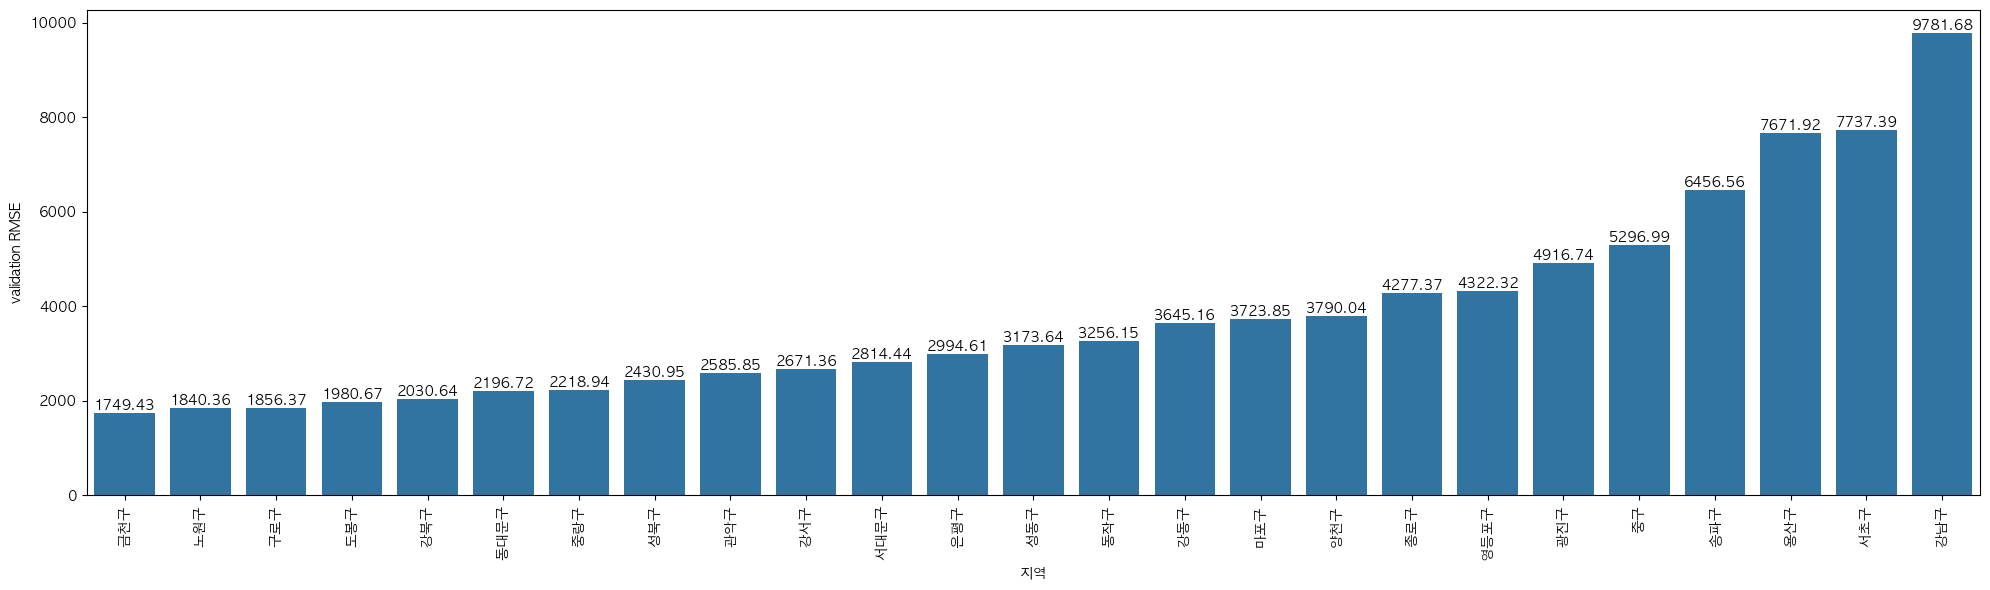

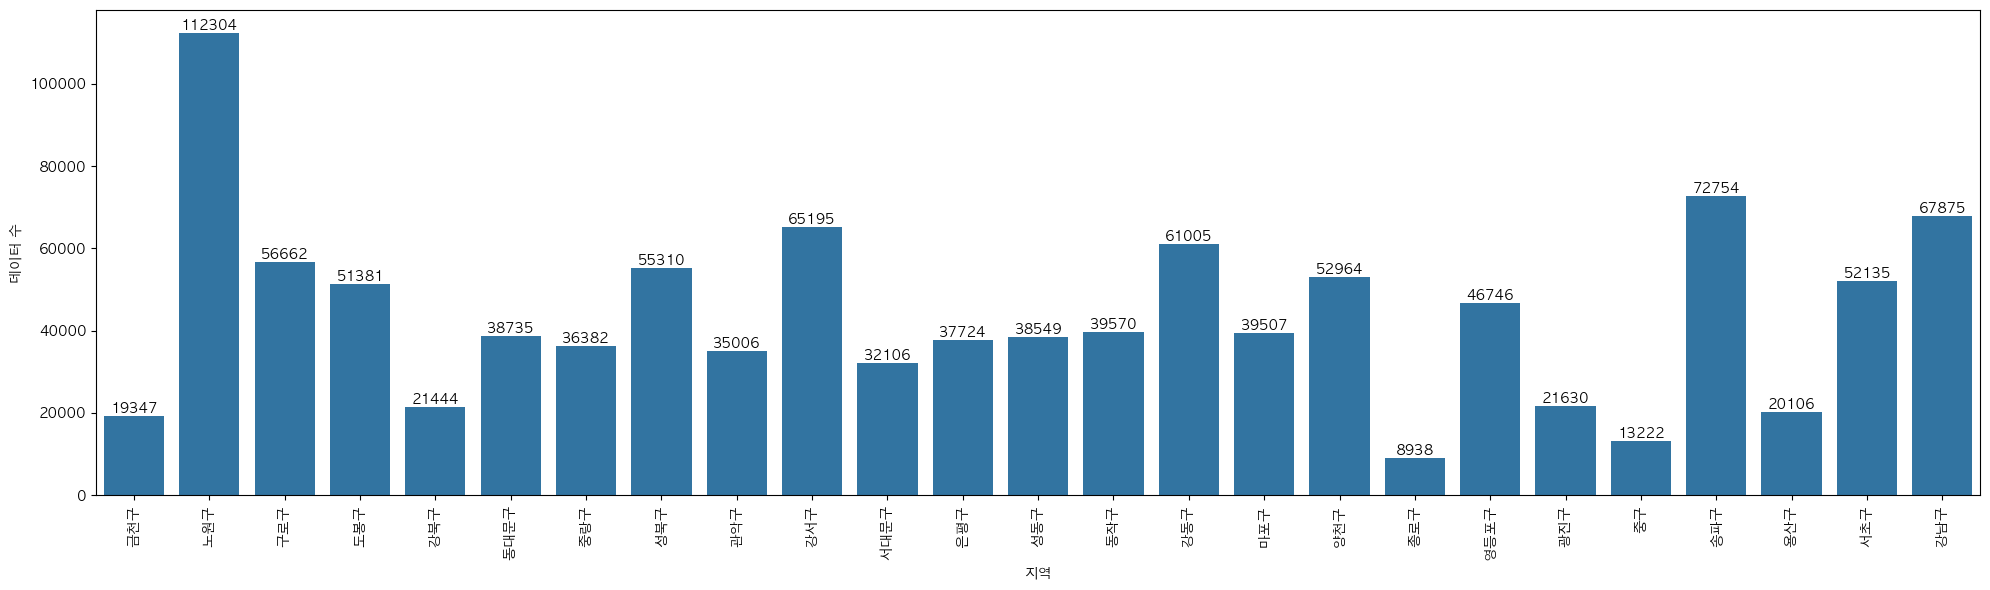

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

result_df = pd.DataFrame(result_board)
result_df = result_df.sort_values(by='validation RMSE')
result_df = result_df[-30:]

# 그래프 생성
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=result_df, x='지역', y='validation RMSE')

# 바 위에 값 표시
for i, v in enumerate(result_df['validation RMSE']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


temp_list = [{"지역" : region, "데이터 수" : len(chunks[region].query("is_test == 0"))} for region in result_df['지역']]
temp_df = pd.DataFrame(temp_list)

plt.figure(figsize=(20, 6))
ax = sns.barplot(data = temp_df, x='지역', y='데이터 수')

# 바 위에 값 표시
for i, v in enumerate(temp_df['데이터 수']):
    ax.text(i, v, f'{v}', ha='center', va='bottom')

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [51]:
submit = result.sort_values(by = 'id')

display(submit)
print(submit.isnull().sum())

submit['target'] = submit['target'] * 1.065
submit['target'] = submit['target'].astype(int)
submit.to_csv('region_devision_remove_outlier(2).csv', index=False)

,id,target
1118822,1118822,180239.354891
1118823,1118823,271930.373164
1118824,1118824,303653.702754
1118825,1118825,254774.907288
1118826,1118826,196970.974655
...,...,...
1128089,1128089,73304.026230
1128090,1128090,66971.655173
1128091,1128091,79338.018988
1128092,1128092,71247.103173


id        0
target    0
dtype: int64
